# LOGISTIC REGRESSION

## Imports

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sb
import matplotlib.pyplot as plt

## Manipulating data

In [3]:
local = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/vendas.csv'
df_original = pd.read_csv(local)

# Retirando colunas 'inúteis'
df = df_original.drop(['Cabecalho', 'Cidade', 'Pais', 'Horario Clique'], axis=1)

In [4]:
dados = df.drop('Comprou', axis=1)
target = df['Comprou']

dados_treino, dados_teste, target_treino, target_teste = train_test_split(dados, target, test_size=0.3, random_state=3)

## Classes

In [5]:
lr = LogisticRegression()
lr.fit(dados_treino, target_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## Score

In [1]:
lr_accuraty = lr.score(dados_teste, target_teste)

print(f'L.R.: {lr_accuraty}')


NameError: name 'lr' is not defined

In [7]:
print(classification_report(target_teste, lr.predict(dados_teste)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       148
           1       0.99      0.91      0.95       152

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## Predicting a new instance's class

In [8]:
# nova instância
person = [[50,17,6000, 180, 0]]
p_lr = lr.predict(person)

print(f'L.R.: {p_lr}')

L.R.: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


## Confusion matrix

In [9]:
matrix_lr = confusion_matrix(target_teste, lr.predict(dados_teste))
matrix_lr

array([[146,   2],
       [ 14, 138]])

## Classes probability

In [10]:
lr_prob = lr.predict_proba(person)

print(f'L.R.: {lr_prob}')

L.R.: [[0.08985903 0.91014097]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


## Graphics

### Compras por tempo de conexão

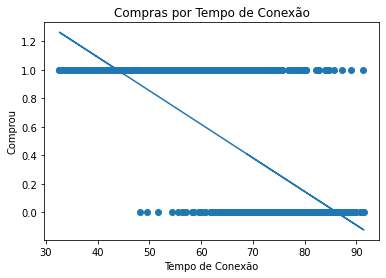

In [11]:
plt.title("Compras por Tempo de Conexão")
plt.xlabel("Tempo de Conexão")
plt.ylabel('Comprou')
plt.scatter(dados['Tempo de Conexao'], target)
m, b = np.polyfit(dados['Tempo de Conexao'], target, 1)
plt.plot(dados['Tempo de Conexao'], m*dados['Tempo de Conexao'] + b)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


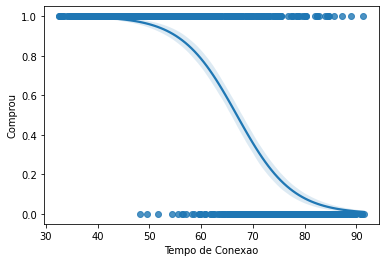

In [12]:
sb.regplot(x='Tempo de Conexao',y='Comprou', data=df, logistic=True)

### Compras por Idade

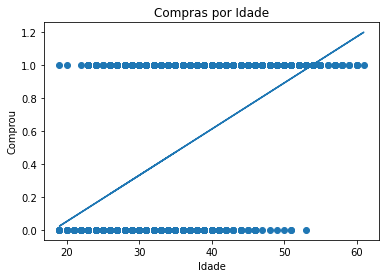

In [13]:
plt.title("Compras por Idade")
plt.xlabel("Idade")
plt.ylabel('Comprou')
plt.scatter(dados['Idade'], target)
m, b = np.polyfit(dados['Idade'], target, 1)
plt.plot(dados['Idade'], m*dados['Idade'] + b)
plt.show()

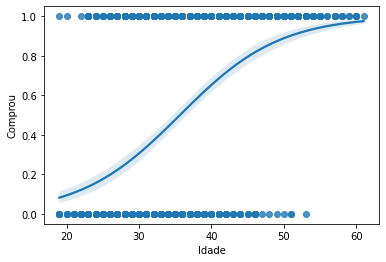

In [14]:
sb.regplot(x='Idade',y='Comprou', data=df, logistic=True)